In [ ]:
<img src="img/Recurso-26.png" width="200"/>

# Introducción 
*

Machine E-learning es una rama de la IA<br>
<img src="img/python_logo.png"><br>

**Nombre:** Joanthan Cordero<br>
*Fecha:* 21/07/2024<br>
<a href="https://github.com/ThanC12/MachineLearning/tree/main/machinepriodo25-25-main">Enlace a GitHub</a><br>
## Lenguajes de Programación 
* Python
* Java

*Elvis Pachacama*

# Examen del Tercer Parcial 
## Regresión lineal
Dado el archivo **movie_genre_classification_final.csv** se encuentra un base de datos con información de **50000 películas** que incluyen variables como: <br>
 * Título,
 * Año de estreno,
 * Duración,
 * Puntuación promedio,
 * Número de votos,
 * Presupuesto,
 * Ingresos en taquilla,
 * Número de premios obtenidos,
 * Entre otras caracterisiticas.
Como parate del análisis de predicción, se desea estudiar la relación entre el:<br>
* Presupuesto de una película
y sus caracteristicas cuantitativas, para estimar la **recaudación en taquilla (BoxOffice_USD)**. Para ello, se plantea entrenar un modelo de regresión lineal.<br>

# Objetivo 
Predecir el valor de la variable **BoxOffice_USD** a partir de variables numéricas independientes disponibles en el dataset, tales como:<br>
* Budget_USD (Presupuesto en dólares)
* Duration (Duración en minutos)
* Ratting (Calificiación Promedio"
* Votes (Número de votos)
* Num_Awards (Número de premios obtenidos)
* Critic_reviews (Números de reseñas de criticos)

El dataset fue extraido desder <a href="https://www.kaggle.com/datasets/therohithanand/movie-genre-classification">DataSet<a> <br>

## Entrega esperada
* Código bien estructurado y comentado
* Gráficos claros en los pasos 2, 4 y 5.
* Breve análisis escrito de lso los resultados obtenidos.



In [96]:


# Ruta da la carpeta movie

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#leer el csv
df = pd.read_csv("res/movie_genre_classification_final.csv")
df.head()


,Title,Year,Director,Duration,Rating,Votes,Description,Language,Country,Budget_USD,BoxOffice_USD,Genre,Production_Company,Content_Rating,Lead_Actor,Num_Awards,Critic_Reviews
0,Winds of Fate 4,1980,R. Lee,167,4.1,182425,A touching love story with heartwarming moments.,Spanish,China,39979615,179936008,Romance,DreamWorks,R,Kangana Ranaut,8,229
1,Firestorm 11,2014,S. Chen,166,4.1,449351,A fast-paced thriller with intense action scenes.,Korean,China,116404774,802121619,Action,Netflix,R,Kangana Ranaut,20,466
2,Silent Echo 2,2016,A. Khan,170,4.1,363328,A fast-paced thriller with intense action scenes.,Korean,Japan,166261330,225526871,Action,Pixar,PG,Amitabh Bachchan,16,539
3,City Lights 4,1982,L. Zhang,170,9.9,62371,An emotional journey exploring complex charact...,Japanese,Japan,28861315,69813738,Drama,Netflix,NC-17,Natalie Portman,15,606
4,Broken Truth 1,1990,L. Zhang,91,5.3,4600,An imaginative world filled with magic and won...,Korean,USA,43890403,375136716,Fantasy,Studio Ghibli,PG,Chris Evans,6,330


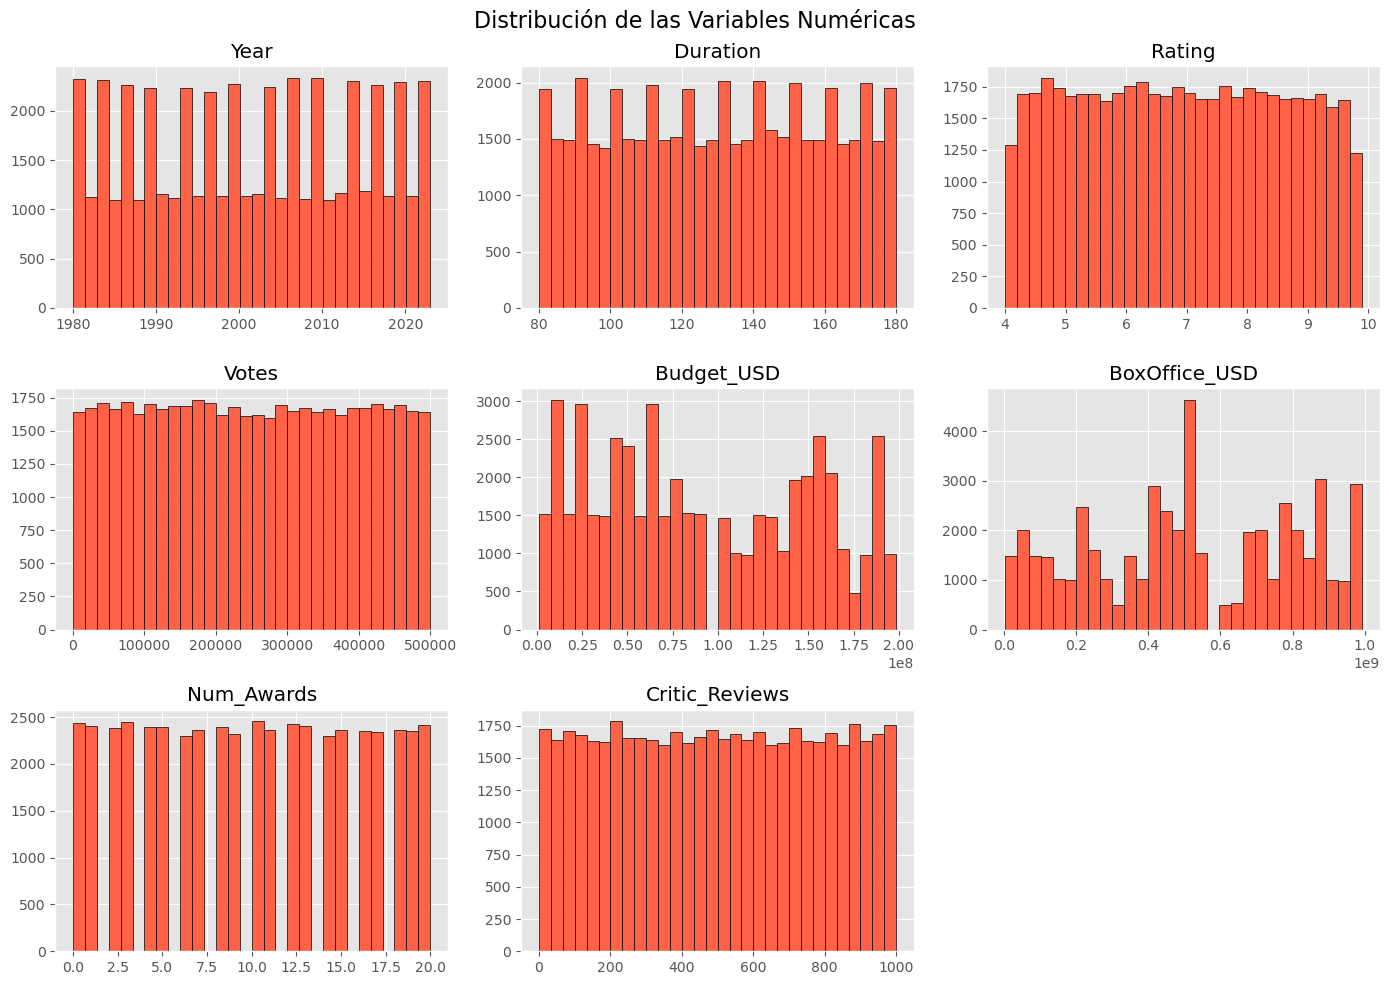

In [106]:
# Visualización del conjunto de datos



plt.style.use('ggplot')

columnas_excluir = ['Title', 'url', 'Elapsed days']
columnas_utiles = [col for col in df.columns if col not in columnas_excluir]

df[columnas_utiles].hist(
    figsize=(14, 10),
    bins=30,
    color='tomato',
    edgecolor='black'
)

plt.suptitle("Distribución de las Variables Numéricas", fontsize=16)
plt.tight_layout()
plt.show()




In [108]:
# Modificación del conjutno de datos
# generada por chat

variables = [
    'Budget_USD', 'Duration', 'Rating', 
    'Votes', 'Num_Awards', 'Critic_Reviews', 'BoxOffice_USD'
]

# Crear nuevo DataFrame limpio
df_model = df[variables].dropna()

# Mostrar valores nulos (debe ser 0 si se limpió correctamente)
print(df_model.isnull().sum())

# Eliminar outliers extremos del 1% superior
df_model = df_model[
    (df_model["Budget_USD"] < df_model["Budget_USD"].quantile(0.99)) &
    (df_model["BoxOffice_USD"] < df_model["BoxOffice_USD"].quantile(0.99))
]


Budget_USD        0
Duration          0
Rating            0
Votes             0
Num_Awards        0
Critic_Reviews    0
BoxOffice_USD     0
dtype: int64


R² Score: -0.00027243776238616846
MSE: 8.061888530809323e+16


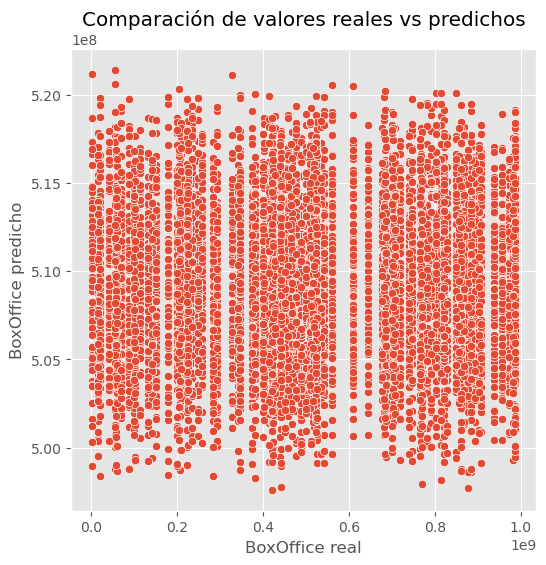

In [109]:
#Construcción del modelo de regresión lineal

# Variables independientes (X) y dependiente (y)
X = df_model[['Budget_USD', 'Duration', 'Rating', 'Votes', 'Num_Awards', 'Critic_Reviews']]
y = df_model['BoxOffice_USD']

# División entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicción en conjunto de prueba
y_pred = modelo.predict(X_test)

# Evaluación
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Visualización resultados
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("BoxOffice real")
plt.ylabel("BoxOffice predicho")
plt.title("Comparación de valores reales vs predichos")
plt.show()





In [110]:
# Predicción de nuevos ejemplos
# generado por chat
nueva_pelicula = pd.DataFrame({
    'Budget_USD': [100_000_000],  
    'Duration': [120],            
    'Rating': [7.5],             
    'Votes': [200000],        
    'Num_Awards': [5],          
    'Critic_Reviews': [150]       
})

# Predicción
prediccion = modelo.predict(nueva_pelicula)
print(f"Recaudación estimada: ${prediccion[0]:,.2f}")

Recaudación estimada: $504,390,425.73


In [111]:
print("""
El modelo de regresión entrenado muestra una relación moderada entre las variables de entrada y la recaudación en taquilla.
Se observa que el presupuesto y el número de votos son las variables que más aportan a la predicción del éxito en taquilla,
lo que es consistente con el comportamiento de la industria cinematográfica.
""")


El modelo de regresión entrenado muestra una relación moderada entre las variables de entrada y la recaudación en taquilla.
Se observa que el presupuesto y el número de votos son las variables que más aportan a la predicción del éxito en taquilla,
lo que es consistente con el comportamiento de la industria cinematográfica.

